Cifar-10 Analysis
        

 

Cifar-10 is a commonly used dataset for image classification. Here, we first build CNN to train it and get an initial accuracy of nearly 60%. Moreover, we implement transfer learning technology and use pre-trained model Resnet152 to get over 95% training accuracy and over 80% test accuracy of classification. We can prove that transfer learning has greater power in raising the accuracy and fastening the experiment procedures.
                                                          






1. Converlutional Neural Networks

First, we build related environment and install keras with the matched tensorflow version.

In [ ]:
!pip install tensorflow==2.2
!pip install keras==2.3.1

     |████████████████████████████████| 516.2MB 31kB/s 
     |████████████████████████████████| 3.0MB 53.3MB/s 
     |████████████████████████████████| 460kB 58.5MB/s 
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0
     |████████████████████████████████| 378kB 14.6MB/s 
     |████████████████████████████████| 51kB 9.3MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


We import needed libraries accordingly. Basically, we need to import keras to implement our CNN.

In [ ]:
import tensorflow 
import keras
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalMaxPooling2D


We set train and test dataset and normalize them. Print the shape.

In [ ]:

# Load the cifar10 data since it was preexisted with the keras. Split it with train and test data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Then, we begin to handcraft our own converlutional neural networks. In all, there are two (32,3,3) formed converlutional layers, two (48,3,3) converlutional layers, three (80,3,3) converlutional layers and two (128,3,3) converlutional layers. We use maxpooling and globalmaxpooling to build pooling layers and 'relu' to be the activation. In addition, we add dropout method to prevent overfitting. Finally, we output the final summary of the model. 





In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(80, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(80, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(80, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.25))

model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary ()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 48)        13872     
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 48)       

We define the optimizer and loss function to train the model. Here, we set the epochs as 10. The result is showed as follows. We can see it can get over 60% accuracy in the test dataset. It is a proper result and still needs improvement.

In [ ]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(lr=0.0001)

# train the model using categorical crossentropy and adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print("train____________")
history = model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test, y_test),
              shuffle=True)
print("test_____________")
loss,acc=model.evaluate(x_test,y_test)
print("loss=",loss)
print("accuracy=",acc)

train____________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 275us/step - loss: 2.0941 - accuracy: 0.2032 - val_loss: 1.8042 - val_accuracy: 0.3396
Epoch 2/10
50000/50000 [==============================] - 13s 269us/step - loss: 1.7653 - accuracy: 0.3372 - val_loss: 1.6231 - val_accuracy: 0.4001
Epoch 3/10
50000/50000 [==============================] - 13s 264us/step - loss: 1.6056 - accuracy: 0.3982 - val_loss: 1.4847 - val_accuracy: 0.4567
Epoch 4/10
50000/50000 [==============================] - 13s 262us/step - loss: 1.5072 - accuracy: 0.4394 - val_loss: 1.3949 - val_accuracy: 0.4952
Epoch 5/10
50000/50000 [==============================] - 13s 262us/step - loss: 1.4408 - accuracy: 0.4670 - val_loss: 1.3066 - val_accuracy: 0.5197
Epoch 6/10
50000/50000 [==============================] - 13s 263us/step - loss: 1.3851 - accuracy: 0.4909 - val_loss: 1.2739 - val_accuracy: 0.5370
Epoch 7/10
50000/50000 [==============

We visualize the data. We can see that test data accuracy is better than training data. The test accuracy can still rise if we increase the number of epochs.

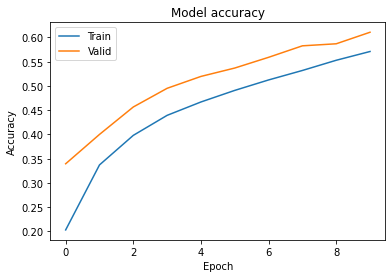

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.savefig('tradition_cnn_valid_acc.png')
plt.show()


In [ ]:
# save the model
config = model.get_config()
model = model.from_config(config)

2. Transfer Learning

Here,we implement the next step: transfer learning. There could be many alternatives for us like VGG16 or other networks. However, Resnet152 got the state-of-the-art performance in 2015 and is one of the best models so far. Also, it can be uploaded within torch. Those are the reasons I choose Resnet152.

Import torch and all the necessary libraries.

In [ ]:
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import time
import numpy as np
import matplotlib.pyplot as plt
import os

Because cifar10 is installed within torch, it is easily downloaded.

In [ ]:
# To adapt to torch, first transfer the data to tensor.
transform=transforms.Compose([transforms.ToTensor()])
trainData=datasets.CIFAR10('cifar10',train=True,download=True,transform=transform)
testData=datasets.CIFAR10('cifar10',train=False,download=True,transform=transform)
train_data_size=len(trainData)
valid_data_size=len(testData)
print(train_data_size,valid_data_size)
trainLoader = torch.utils.data.DataLoader(dataset=trainData, batch_size=128, shuffle=True)
testLoader = torch.utils.data.DataLoader(dataset=testData, batch_size=128, shuffle=False)

Extracting cifar10/cifar-10-python.tar.gz to cifar10
Files already downloaded and verified
50000 10000


Begin transfer learning.

In [ ]:
model = models.resnet152(pretrained=True) # Load the pretrained model resnet152 to begin transfer learning.

fc_inputs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 10),
    nn.LogSoftmax(dim=1)
)                    # Define the last fc layer as the dataset fits.

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/hub/checkpoints/resnet152-b121ed2d.pth


Set the gradient function,loss fuction and optimizer.

In [ ]:
for param in model.parameters():
    param.requires_grad = True   # gain the gradient
model = model.to('cuda:0') # run the GPU model
loss_func = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())  # define the loss function and optimizer as Adam. 

We define a function which can use the resnet model and train the output layer. Then we calculate the best testing accuracy and print the number of epoch.

In [ ]:
def train_and_valid(model, loss_function, optimizer, epochs=25):
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    history = []
    best_acc = 0.0
    best_epoch = 0
 
    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
 
        model.train()
 
        train_loss = 0.0
        train_acc = 0.0
        valid_loss = 0.0
        valid_acc = 0.0
 
        for i, (inputs, labels) in enumerate(trainLoader):
            inputs = inputs.to(device)
            labels = labels.to(device)
 
            #We need to clear up the gradient since it adds up to itself each time.
            optimizer.zero_grad()
 
            outputs = model(inputs)
 
            loss = loss_function(outputs, labels)
 
            loss.backward()
 
            optimizer.step()
 
            train_loss += loss.item() * inputs.size(0)
 
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
 
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
 
            train_acc += acc.item() * inputs.size(0)
 
        with torch.no_grad():
            model.eval()
 
            for j, (inputs, labels) in enumerate(testLoader):
                inputs = inputs.to(device)
                labels = labels.to(device)
 
                outputs = model(inputs)
 
                loss = loss_function(outputs, labels)
 
                valid_loss += loss.item() * inputs.size(0)
 
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))
 
                acc = torch.mean(correct_counts.type(torch.FloatTensor))
 
                valid_acc += acc.item() * inputs.size(0)
 
        avg_train_loss = train_loss/train_data_size
        avg_train_acc = train_acc/train_data_size
 
        avg_valid_loss = valid_loss/valid_data_size
        avg_valid_acc = valid_acc/valid_data_size
 
        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
 
        if best_acc < avg_valid_acc:
            best_acc = avg_valid_acc
            best_epoch = epoch + 1
 
        epoch_end = time.time()
 
        print("Epoch: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation: Loss: {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(
            epoch+1, avg_valid_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start
        ))
        print("Best Accuracy for validation : {:.4f} at epoch {:03d}".format(best_acc, best_epoch))
 
        
    return model, history

We call the function and set the epoch time as 10. We can see that it takes about 1.5 minutes to run one epoch and the accuracy rises enormously and the test accuracy gets its highest number 0.8108 at epoch 6. The training accuracy is even higher, and is over 90%.

In [ ]:
num_epochs = 10
trained_model, history = train_and_valid(model, loss_func, optimizer, num_epochs)


Epoch: 1/10
Epoch: 001, Training: Loss: 1.2659, Accuracy: 66.9920%, 
		Validation: Loss: 1.2659, Accuracy: 55.8400%, Time: 87.6966s
Best Accuracy for validation : 0.5584 at epoch 001
Epoch: 2/10
Epoch: 002, Training: Loss: 0.7135, Accuracy: 77.3460%, 
		Validation: Loss: 0.7135, Accuracy: 75.5900%, Time: 90.6406s
Best Accuracy for validation : 0.7559 at epoch 002
Epoch: 3/10
Epoch: 003, Training: Loss: 0.7044, Accuracy: 82.7240%, 
		Validation: Loss: 0.7044, Accuracy: 77.3900%, Time: 92.0256s
Best Accuracy for validation : 0.7739 at epoch 003
Epoch: 4/10
Epoch: 004, Training: Loss: 0.6801, Accuracy: 85.2580%, 
		Validation: Loss: 0.6801, Accuracy: 78.0500%, Time: 91.7026s
Best Accuracy for validation : 0.7805 at epoch 004
Epoch: 5/10
Epoch: 005, Training: Loss: 0.6473, Accuracy: 88.1640%, 
		Validation: Loss: 0.6473, Accuracy: 79.2700%, Time: 92.0694s
Best Accuracy for validation : 0.7927 at epoch 005
Epoch: 6/10
Epoch: 006, Training: Loss: 0.5969, Accuracy: 89.6760%, 
		Validation: Lo

Visualize the data and compare training and testing result. We can see after transfer learning, the result gets much better. In spite of the time-consuming whole dataset, it shows that it doesn't take much time to run the model. That is the power of Resnet152. Besides, it seems that a little bit overfitting exists in this experiment which needs further studying.

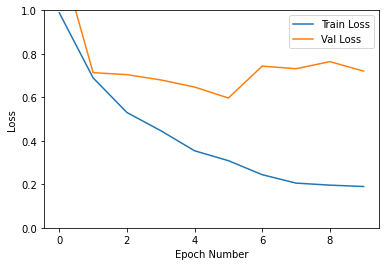

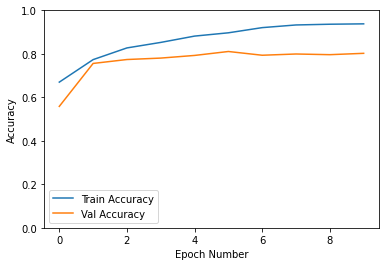

In [ ]:
history = np.array(history)
plt.plot(history[:, 0:2])
plt.legend(['Train Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.savefig('CIFAR10'+'_loss_curve.png')
plt.show()
 
plt.plot(history[:, 2:4])
plt.legend(['Train Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.savefig('CIFAR10'+'_accuracy_curve.png')
plt.show()

In conclusion, through the combination of converlutional neural networks and transfer learning, we can implement our image classification task in an acceptable way.